# 1. Importing Libraries

In [3]:
### Input
import pandas as pd # Handle Dataframes

### Visualization
import matplotlib.pyplot as plt # Figuring for Feature selection
import seaborn as sns # Visualize relations between selected features and target

### Preprocessing
from sklearn.preprocessing import LabelEncoder # Change cateogorical variables to numerical values
from sklearn.preprocessing import MinMaxScaler # Normalizing numerical data

### Feature selection
from sklearn.feature_selection import SelectKBest # Univariate feature selection
from sklearn.feature_selection import chi2 

### Sampling techniques
from imblearn.under_sampling import RandomUnderSampler # Random Under Sampling tecnique
from imblearn.under_sampling import NearMiss # NearMiss Under Sampling tecnique
from imblearn.over_sampling import SMOTE # Smote Over Sampling tecnique

### Classifers
from sklearn.ensemble import RandomForestClassifier # Random Forest Classification
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classification
from sklearn.linear_model import LogisticRegression # Logistic Regression Classification
from xgboost import XGBClassifier # XGBoost Classification

### Evaluation metrics
from sklearn.metrics import confusion_matrix # Confussion Matrix evaluation
from sklearn.model_selection import cross_val_score # Cross validation technique
from sklearn.metrics import f1_score # F1 score evaluation
from sklearn.metrics import accuracy_score # Accuracy Score evaluation

# 2. Inputting data to learn

In [4]:
ATTRIBUTES = pd.read_csv(r'C:\Users\SW060\Desktop\DataStorm_2.0_@Kaggle\Hotel-A-data-dictionary.csv')
TRAIN_INPUT = pd.read_csv(r'C:\Users\SW060\Desktop\DataStorm_2.0_@Kaggle\Hotel-A-train.csv')
TEST_INPUT = pd.read_csv(r'C:\Users\SW060\Desktop\DataStorm_2.0_@Kaggle\Hotel-A-test.csv')
VALIDATION_INPUT = pd.read_csv(r'C:\Users\SW060\Desktop\DataStorm_2.0_@Kaggle\Hotel-A-validation.csv')

#ATTRIBUTES
#TRAIN.head()
#TEST.head()
#VALIDATION.head()

# 3. Preprocessing

In [5]:
### 1. Analysis on distribution

# Printing size of data using Shape
print ("Train data shape : ", TRAIN_INPUT.shape)
print ("Test data shape : ", TEST_INPUT.shape)
print ("Validation data shape : ", VALIDATION_INPUT.shape)

print ('\n')

# Confirm distribution of TRAIN, TEST & VALIDATION data
TOTAL_RECORD = TRAIN_INPUT.shape[0] + TEST_INPUT.shape[0] + VALIDATION_INPUT.shape[0]
print ("Percentage of Train data : ", TRAIN_INPUT.shape[0]/TOTAL_RECORD)
print ("Percentage of Test data : ", TEST_INPUT.shape[0]/TOTAL_RECORD)
print ("Percentage of Validation data : ", VALIDATION_INPUT.shape[0]/TOTAL_RECORD)

Train data shape :  (27499, 24)
Test data shape :  (4318, 23)
Validation data shape :  (2749, 24)


Percentage of Train data :  0.7955505409940404
Percentage of Test data :  0.12492044205288434
Percentage of Validation data :  0.07952901695307528


Therefore, 80% data to training, 12% data to testing and 8% data to validation => Data is distributed perfectly

In [6]:
### 2. Checking mising values

print ("Missing values in TRAIN data :      ", TRAIN_INPUT.isnull().sum().sum())
print ("Missing values in TEST data :       ", TEST_INPUT.isnull().sum().sum())
print ("Missing values in VALIDATION data : ", VALIDATION_INPUT.isnull().sum().sum())

Missing values in TRAIN data :       0
Missing values in TEST data :        0
Missing values in VALIDATION data :  0


Therefore no nan values in any data => No need to fill nan values

In [7]:
### 3. Statistical analysis on data

print (TRAIN_INPUT.describe())
#print (TEST.describe())
#print (VALIDATION.describe())
print ('\n')

### Display datatype to find object columns

print (TRAIN_INPUT.info())
print ('\n')
print (TEST_INPUT.info())
print ('\n')
print (VALIDATION_INPUT.info())
print ('\n')

TRAIN_INPUT.select_dtypes(include=['object']).head(7)

       Reservation-id           Age        Adults      Children        Babies  \
count    2.749900e+04  27499.000000  27499.000000  27499.000000  27499.000000   
mean     5.016461e+07     43.977454      2.333576      1.743882      0.351540   
std      2.886911e+07     15.303148      1.176526      0.721972      0.573326   
min      3.154000e+03     18.000000      1.000000      1.000000      0.000000   
25%      2.523943e+07     31.000000      2.000000      1.000000      0.000000   
50%      5.014996e+07     44.000000      2.000000      2.000000      0.000000   
75%      7.518288e+07     57.000000      3.000000      2.000000      1.000000   
max      9.999900e+07     70.000000      5.000000      3.000000      2.000000   

       Discount_Rate     Room_Rate  
count   27499.000000  27499.000000  
mean       12.495182    175.136478  
std        11.206036     43.877087  
min         0.000000    100.000000  
25%         5.000000    137.000000  
50%        10.000000    175.000000  
75%        

,Gender,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion
0,F,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,BB,No,No,No Deposit,Online,Yes,Check-In,Yes
1,F,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,BB,No,No,Refundable,Online,Yes,Check-In,No
2,F,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,BB,No,No,No Deposit,Online,Yes,Check-In,No
3,M,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,6/20/2015,BB,No,No,Refundable,Agent,Yes,Check-In,Yes
4,F,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,6/20/2015,BB,No,No,No Deposit,Direct,No,Check-In,Yes
5,M,African American,College,>100K,North,Airport Hotels,7/3/2015,7/4/2015,6/20/2015,BB,Yes,No,No Deposit,Online,No,Check-In,Yes
6,F,African American,High-School,<25K,East,Airport Hotels,7/3/2015,7/4/2015,7/4/2015,BB,Yes,Yes,Refundable,Online,Yes,Check-In,Yes


In [8]:
### 4. Cateogorical -> Numerical

In [9]:
# Unique cateogorical variables in each columns
OBJECT_COLUMNS = []

for col in TRAIN_INPUT.select_dtypes(include=['object']).columns:
    print ("Unique records in ", col, "are : ", len(TRAIN_INPUT[col].unique()))

Unique records in  Gender are :  2
Unique records in  Ethnicity are :  4
Unique records in  Educational_Level are :  4
Unique records in  Income are :  4
Unique records in  Country_region are :  4
Unique records in  Hotel_Type are :  3
Unique records in  Expected_checkin are :  901
Unique records in  Expected_checkout are :  929
Unique records in  Booking_date are :  1133
Unique records in  Meal_Type are :  3
Unique records in  Visted_Previously are :  2
Unique records in  Previous_Cancellations are :  2
Unique records in  Deposit_type are :  3
Unique records in  Booking_channel are :  3
Unique records in  Required_Car_Parking are :  2
Unique records in  Reservation_Status are :  3
Unique records in  Use_Promotion are :  2


So many unique records in the date => Better to drop Expected_checkin, Expected_checkout, Booking_date columns in data

In [10]:
# Dropping three date columns in TRAIN, TEST & VALIDATION 

TRAIN = TRAIN_INPUT.drop(["Expected_checkin", "Expected_checkout", "Booking_date"], axis=1)
TEST = TEST_INPUT.drop(["Expected_checkin", "Expected_checkout", "Booking_date"], axis=1)
VALIDATION = VALIDATION_INPUT.drop(["Expected_checkin", "Expected_checkout", "Booking_date"], axis=1)

In [11]:
# Separate data into X(Independant variables) and y(dependant variables)

TRAIN_y = TRAIN["Reservation_Status"]
TRAIN_x = TRAIN.drop(["Reservation_Status", "Reservation-id"], axis = 1)
VALIDATION_y = VALIDATION ["Reservation_Status"]
VALIDATION_x = VALIDATION.drop(["Reservation_Status", "Reservation-id"], axis = 1)
TEST_ID = TEST["Reservation-id"]
TEST_x = TEST.drop(["Reservation-id"], axis=1)

Reservation_Status : 
    
check-in as class 1, cancel as class 2 and no-show as class 3

In [12]:
# Cateogorical -> Numerical on "X" using Label Encoder technique
TRAIN_X_ENCODED = TRAIN_x.apply(LabelEncoder().fit_transform)
TEST_X_ENCODED = TEST_x.apply(LabelEncoder().fit_transform)
VALIDATION_X_ENCODED = VALIDATION_x.apply(LabelEncoder().fit_transform)

# definition for changing y from cateogorical to numerical .....
def y_encoding(Y, a, b, c):
    LIST = []
    for i in range(len(Y)):
        if Y[i] == a:
            LIST.append(1)
        elif Y[i] == b:
            LIST.append(2)
        elif Y[i] == c:
            LIST.append(3)
    return (pd.Series(LIST))

# Cateogorical -> Numerical on "y" using Label Encoder technique
a, b, c = TRAIN["Reservation_Status"].unique()
TRAIN_y_ENCODED = y_encoding(TRAIN_y, a, b, c)
VALIDATION_y_ENCODED = y_encoding(VALIDATION_y, a, b, c)

In [13]:
# Normalizing all X {0 - 1}

scaler = MinMaxScaler()
TRAIN_X_ENCODED_NORMALIZED = pd.DataFrame(scaler.fit_transform(TRAIN_X_ENCODED), columns=TRAIN_X_ENCODED.columns)
TEST_X_ENCODED_NORMALIZED = pd.DataFrame(scaler.fit_transform(TEST_X_ENCODED), columns=TEST_X_ENCODED.columns)
VALIDATION_X_ENCODED_NORMALIZED = pd.DataFrame(scaler.fit_transform(VALIDATION_X_ENCODED), columns=VALIDATION_X_ENCODED.columns)

In [14]:
### 5. Preparing dataframe to learn process

TRAIN_X = TRAIN_X_ENCODED_NORMALIZED
TRAIN_Y = TRAIN_y_ENCODED

VAL_X = VALIDATION_X_ENCODED_NORMALIZED
VAL_Y = VALIDATION_y_ENCODED

TEST_X = TEST_X_ENCODED_NORMALIZED
ID = TEST_ID

print ("Train data X shape is :      ", TRAIN_X.shape)
print ("Train data Y shape is :      ", TRAIN_Y.shape)
print('\n')
print ("Validation data X shape is : ", VAL_X.shape)
print ("Validation data Y shape is : ", VAL_Y.shape)
print('\n')
print ("Test data ID shape is :      ", ID.shape)
print ("Test data X shape is :       ", TEST_X.shape)

Train data X shape is :       (27499, 19)
Train data Y shape is :       (27499,)


Validation data X shape is :  (2749, 19)
Validation data Y shape is :  (2749,)


Test data ID shape is :       (4318,)
Test data X shape is :        (4318, 19)


# 4. Feature selection - Correlation technique

#### First univariate selection using SelectKBest and chi2 libraries technique is used. 
#### But, gave lower F1 score for 4 classification models
#### Therefore, correlation technique is used for feature selection and it results better F1 score than univariate selection

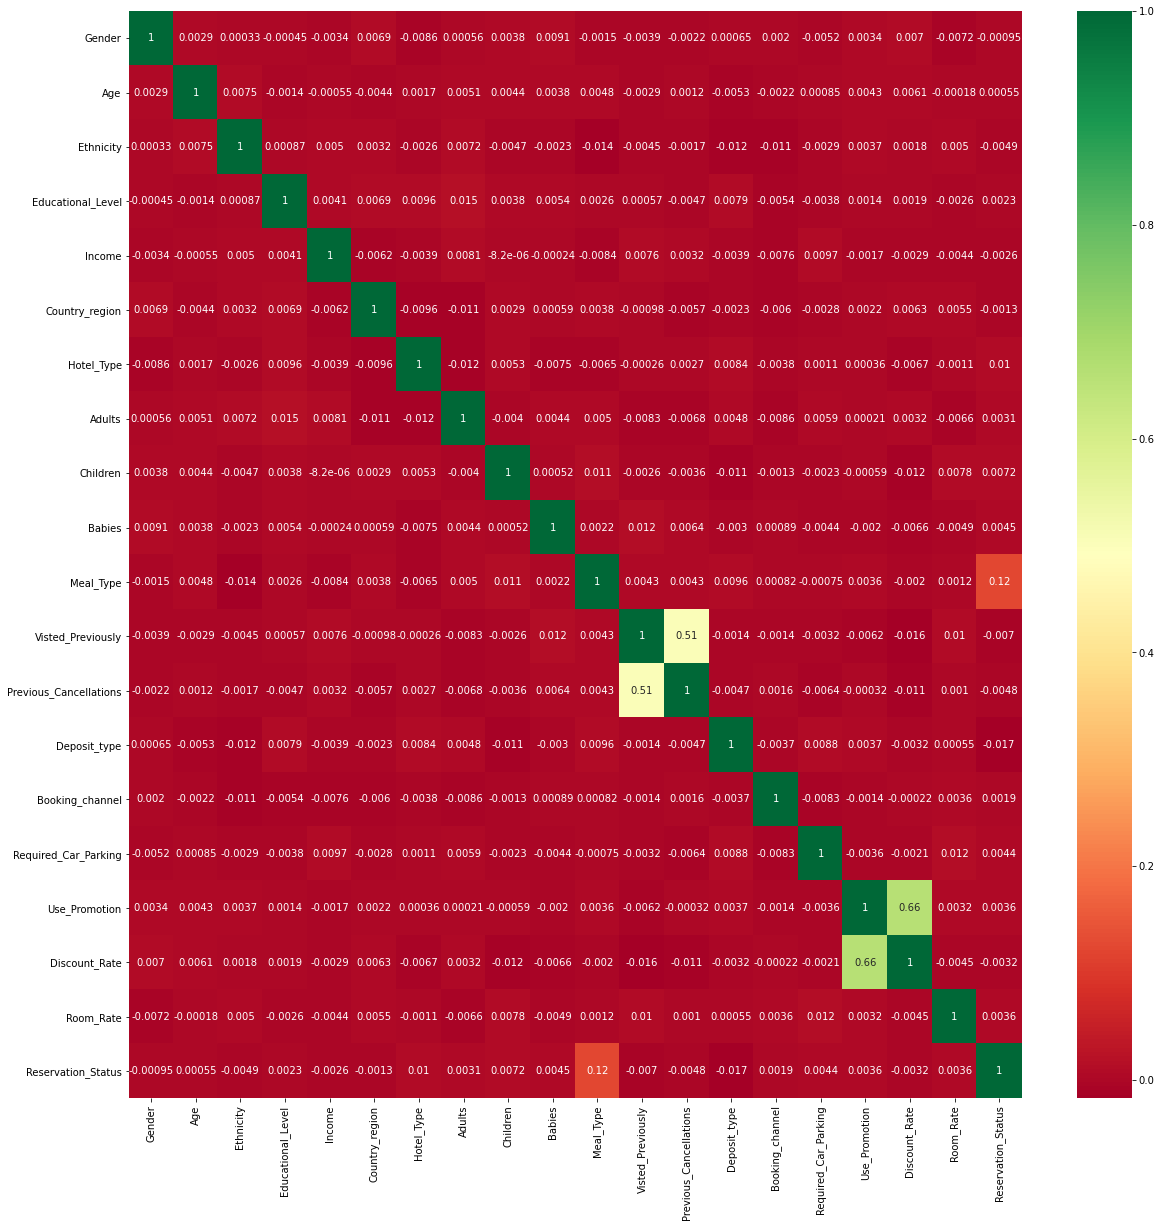

In [15]:
# Heat map for correlations between each columns of training data
DATA = TRAIN_X
DATA["Reservation_Status"] = TRAIN_Y
corrmat = DATA.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(DATA[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [16]:
CORRELATION = DATA[top_corr_features].corr()["Reservation_Status"]
print (CORRELATION)
print ('\n')
sorted(abs(CORRELATION))[-7:-1] # Top 6 best features which correlates with Reservation_Status (Target) well

Gender                   -0.000950
Age                       0.000554
Ethnicity                -0.004865
Educational_Level         0.002259
Income                   -0.002569
Country_region           -0.001311
Hotel_Type                0.010441
Adults                    0.003079
Children                  0.007180
Babies                    0.004473
Meal_Type                 0.122615
Visted_Previously        -0.007038
Previous_Cancellations   -0.004780
Deposit_type             -0.017136
Booking_channel           0.001899
Required_Car_Parking      0.004444
Use_Promotion             0.003622
Discount_Rate            -0.003173
Room_Rate                 0.003621
Reservation_Status        1.000000
Name: Reservation_Status, dtype: float64




[0.004864862091784543,
 0.007037628326244147,
 0.007180244257816336,
 0.01044078587867064,
 0.0171360514596982,
 0.12261483656810061]

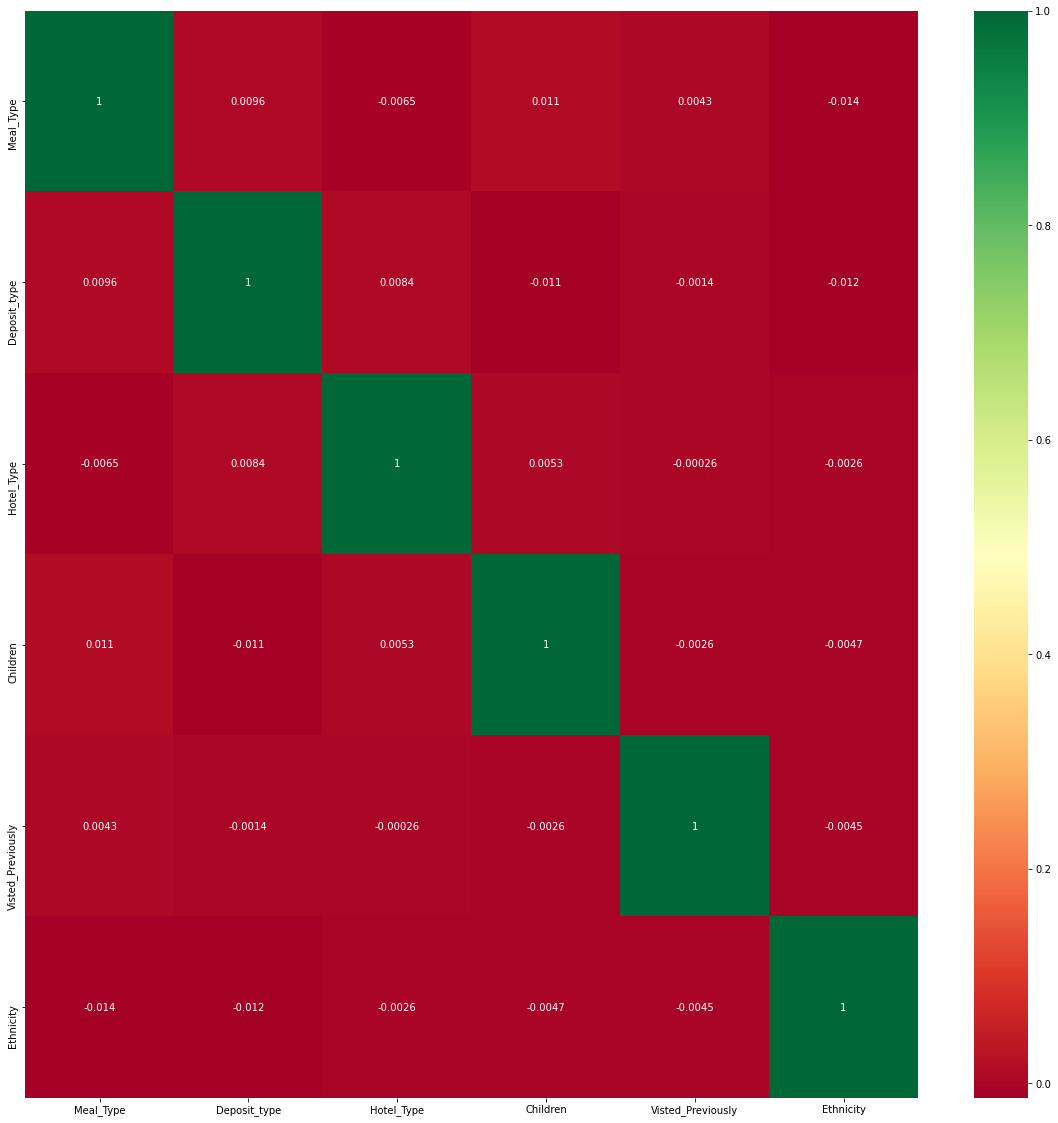

In [17]:
# Top 6 features
FEATURES_CHOSEN = ["Meal_Type", "Deposit_type", "Hotel_Type", "Children", "Visted_Previously", "Ethnicity"]

# Heat map for selected features
DATA1 = DATA[FEATURES_CHOSEN]
corrmat = DATA1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(DATA[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Therefore selected features doesn't have that much of relation between them

In [18]:
train_x = TRAIN_X[FEATURES_CHOSEN]
val_x = VAL_X[FEATURES_CHOSEN]
test_x = TEST_X[FEATURES_CHOSEN]

# 5. Sampling technique to balance the dataset - Inbuilt Randomsampler 

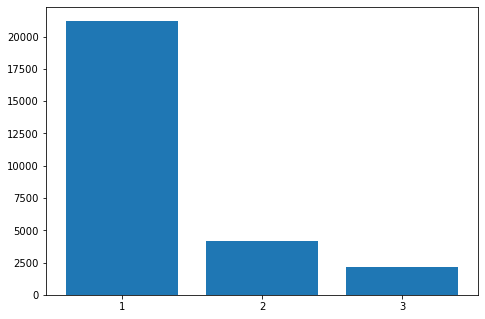

In [19]:
# Bar plot for counts in each class in Training data

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["1", "2", "3"]
students = TRAIN_Y.value_counts()
ax.bar(langs,students)
plt.show()

### Eventhough Nearmiss and SMOTE sampling technique used but RandomSampler gave better F1 score

In [27]:
# Builtin - Undersampling technique using RandomSampler

ros = RandomUnderSampler(random_state=42)# fit predictor and target variable
X_rus, y_rus = ros.fit_resample(train_x, TRAIN_Y)

print (X_rus.shape)
print (y_rus.shape)

(6375, 6)
(6375,)


# 6. Data visualization

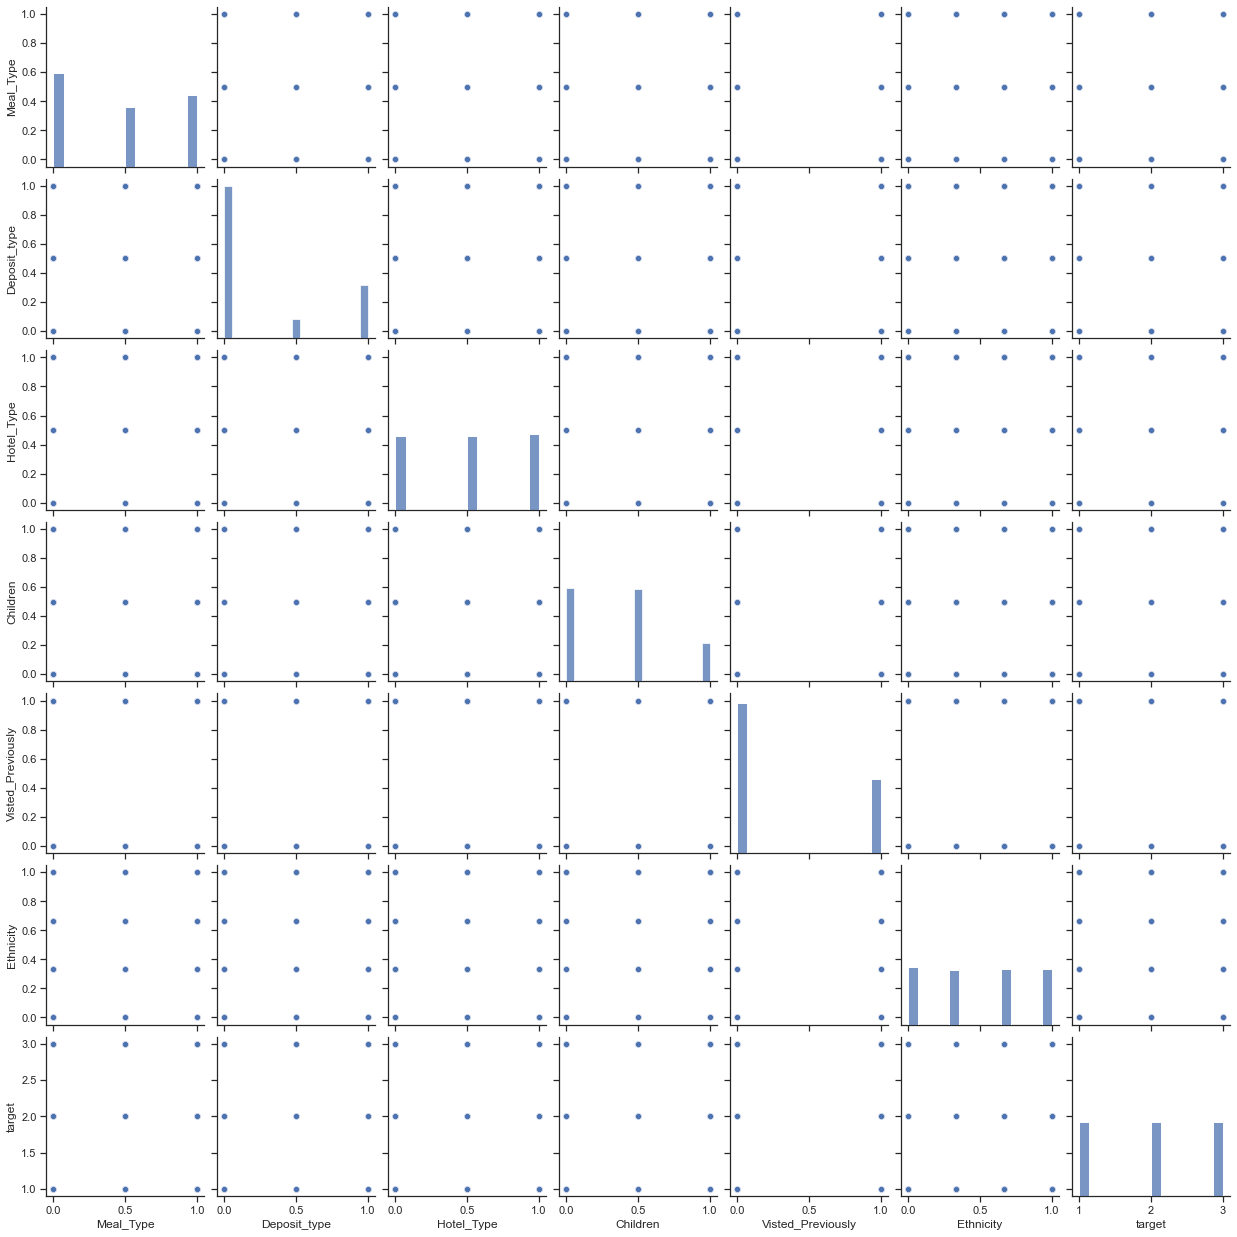

In [21]:
sns.set(style="ticks", color_codes=True)
data_plot = train_x
data_plot["target"] = TRAIN_Y
g = sns.pairplot(data_plot)

# 7. Classification using models

### I. Random Forest Classifier

In [28]:
rfc = RandomForestClassifier()# define model
rfc.fit(X_rus, y_rus)# fit model
rfc_predict = rfc.predict(val_x)# check performance

### II. Decision Tree Classifier

Importance of each feature is 

Feature: 0, Score: 0.20057
Feature: 1, Score: 0.17115
Feature: 2, Score: 0.14571
Feature: 3, Score: 0.15533
Feature: 4, Score: 0.13013
Feature: 5, Score: 0.19711


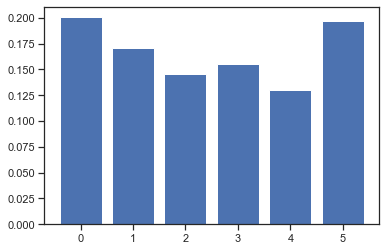

In [29]:
# 2. Decision Tree Classifier

dtc = DecisionTreeClassifier()# define model
dtc.fit(X_rus, y_rus)# fit model
dtc_predict = dtc.predict(val_x)# check performance

importance = dtc.feature_importances_
# summarize feature importance
print ("Importance of each feature is \n")
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### III. Logistic Regression

In [30]:
lr = LogisticRegression()# define model
lr.fit(X_rus, y_rus)# fit model
lr_predict = lr.predict(val_x)# check performance

### IV. XGBoost

In [31]:
xgb = XGBClassifier()# define model
xgb.fit(X_rus, y_rus)# fit model
xgb_predict = xgb.predict(val_x)# check performance

C:\Users\SW060\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# 8. Evaluation of each models

### a) Macro F1 score

In [32]:
# Random Forest Classifier
print('F1 score - RFC : ', f1_score(VAL_Y, rfc_predict, average = 'macro'))

# Decision Tree Classifier
print('F1 score - DTC : ', f1_score(VAL_Y, dtc_predict, average = 'macro'))

# Logistic Regression
print('F1 score - LR : ', f1_score(VAL_Y, lr_predict, average = 'macro'))

# XGBoost
print('F1 score - XGB : ', f1_score(VAL_Y, xgb_predict, average = 'macro'))

F1 score - RFC :  0.3273191355963074
F1 score - DTC :  0.33631731080433
F1 score - LR :  0.3188060852571771
F1 score - XGB :  0.33421443528788247


# Therefore, Decision Tree Classifier performs well here

### b) Confusion matrix

In [33]:
# Random Forest Classifier
print('Confusion Matrix - RFC : ', confusion_matrix(VAL_Y, rfc_predict))

# Decision Tree Classifier
print ('Confusion Matrix - DTC : ', confusion_matrix(VAL_Y, dtc_predict))

# Logistic Regression
print ('Confusion Matrix - LR : ', confusion_matrix(VAL_Y, lr_predict))

# XGBoost
print ('Confusion Matrix - XGB : ', confusion_matrix(VAL_Y, xgb_predict))

Confusion Matrix - RFC :  [[636 490 484]
 [258 244 239]
 [142 133 123]]
Confusion Matrix - DTC :  [[710 482 418]
 [278 248 215]
 [160 133 105]]
Confusion Matrix - LR :  [[599 386 625]
 [236 199 306]
 [138 101 159]]
Confusion Matrix - XGB :  [[668 461 481]
 [267 244 230]
 [144 133 121]]


### c) Accuracy score

In [34]:
# Random Forest Classifier
print('Accuracy score - RFC : ', accuracy_score(VAL_Y, rfc_predict)*100)

# Decision Tree Classifier
print('Accuracy score - DTC : ', accuracy_score(VAL_Y, dtc_predict)*100)

# Logistic Regression
print('Accuracy score - LR : ', accuracy_score(VAL_Y, lr_predict)*100)

# XGBoost
print('Accuracy score - XGB: ',accuracy_score(VAL_Y, xgb_predict)*100)


Accuracy score - RFC :  36.485994907239
Accuracy score - DTC :  38.668606766096765
Accuracy score - LR :  34.81265914878138
Accuracy score - XGB:  37.57730083666788


### d) Cross validation score

In [35]:
# Random Forest Classifier
print ("Random Forest Classifier : \n")
accuracies1 = cross_val_score(estimator = rfc, X = X_rus, y = y_rus, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print ('\n')

# Decision Tree Classifier
print ("Decision Tree Classifier : \n")
accuracies2 = cross_val_score(estimator = dtc, X = X_rus, y = y_rus, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))
print ('\n')

# Logistic Regression
print ("Logistic Regression : \n")
accuracies3 = cross_val_score(estimator = lr, X = X_rus, y = y_rus, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print ('\n')

# XGBoost
print ("XGBoost : \n")
accuracies4 = cross_val_score(estimator = xgb, X = X_rus, y = y_rus, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))

Random Forest Classifier : 

Accuracy: 38.23 %
Standard Deviation: 1.95 %


Decision Tree Classifier : 

Accuracy: 38.04 %
Standard Deviation: 1.99 %


Logistic Regression : 

Accuracy: 40.17 %
Standard Deviation: 1.40 %


XGBoost : 

[20:05:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\SW060\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:05:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:05:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

# Therefore, high f1 score achieved when ;
* ### Correlation feature selection technique is used & 6 best features chosen
* ### Random under sampling technique to balance the training dataset
* ### Decision Tree Classification model is used to learn and evaluate the model